## YOLOX Installation
Some of the installations will take a while, don't worry.

In [63]:
#check your CUDA version before installing this
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------- ----------------------------- 1.0/4.0 MB 5.0 MB/s eta 0:00:01
     --------------------------------- ------ 3.4/4.0 MB 8.4 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------- ----------------------------- 1.0/4.0 MB 5.0 MB/s eta 0:00:01
     ---------------------------------- ----- 3.4/4.0 MB 8.4 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 8.8 MB/s eta 0:00:00
     -------------------------------------

In [ ]:
!git clone https://github.com/Megvii-BaseDetection/YOLOX -b 0.3.0

In [1]:
import os

# Set the target folder
yolox_dir = "./YOLOX"
os.chdir(yolox_dir)
print(f"⚠️ Changed working directory to: {os.getcwd()}")

!pip install -U pip && pip install -r requirements.txt
!pip install -v -e .  

⚠️ Changed working directory to: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample\YOLOX
  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\aarnaizl\AppData\Local\miniconda3\envs\yolox_colab\python.exe -m pip install -U pip


Using pip 24.2 from C:\Users\aarnaizl\AppData\Local\miniconda3\envs\yolox_colab\lib\site-packages\pip (python 3.8)
Obtaining file:///C:/Users/aarnaizl/Documents/YOLOX-Colaboratory-Training-Sample/YOLOX
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: yolox
    Found existing installation: yolox 0.3.0
    Uninstalling yolox-0.3.0:
      Removing file or directory c:\users\aarnaizl\appdata\local\miniconda3\envs\yolox_colab\lib\site-packages\yolox.egg-link
      Removing pth entries from c:\users\aarnaizl\appdata\local\miniconda3\envs\yolox_colab\lib\site-packages\easy-install.pth:
      Removing entry: c:\users\aarnaizl\documents\yolox-colaboratory-training-sample\yolox
      Successfully uninstalled yolox-0.3.0
  Running setup.py develop for yolox


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info
  writing C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\PKG-INFO
  writing dependency_links to C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\dependency_links.txt
  writing requirements to C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\requires.txt
  writing top-level names to C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\top_level.txt
  writing manifest file 'C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-b6q_35to\yolox.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file 'C:\Users\aarnaizl\AppData\Local\Temp\pip-pip-egg-info-

In [43]:
!pip install loguru thop ninja onnx onnxsim onnxruntime onnxruntime-gpu

In [ ]:
!pip install protobuf==3.20.3 setuptools==59.5.0 numpy==1.21.6

   ---------------------------------------- 0.0/14.0 MB ? eta -:--:--
   -- ------------------------------------- 1.0/14.0 MB 5.6 MB/s eta 0:00:03
   ------- -------------------------------- 2.6/14.0 MB 6.6 MB/s eta 0:00:02
   ------------- -------------------------- 4.7/14.0 MB 7.9 MB/s eta 0:00:02
   ----------------- ---------------------- 6.3/14.0 MB 8.0 MB/s eta 0:00:01
   --------------------- ------------------ 7.6/14.0 MB 7.5 MB/s eta 0:00:01
   -------------------------- ------------- 9.4/14.0 MB 7.6 MB/s eta 0:00:01
   ----------------------------- ---------- 10.5/14.0 MB 7.7 MB/s eta 0:00:01
   ----------------------------------- ---- 12.3/14.0 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 14.0/14.0 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install pycocotools-windows

## Dataset Preparation

#### Train/Validation split data

In [ ]:
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(root_dir)
print(f"⚠️ Changed working directory to: {root_dir}")

Changed working directory to: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample


In [29]:
import os

# 独自のデータを使用する場合は、パスを指定してください
# Please fill in the path if you want to use your own data
dataset_directory = './02.annotation_data'


# 学習/検証データパス(train/validation data path)
train_directory = './train'
validation_directory = './validation'


# 学習データ格納ディレクトリ作成(Create training data storage directory)
os.makedirs(train_directory, exist_ok=True)
print(f"Training data directory created at: {os.path.abspath(train_directory)}")
# 検証データ格納ディレクトリ作成(Create verification data storage directory)
os.makedirs(validation_directory, exist_ok=True)
print(f"Validation data directory created at: {os.path.abspath(validation_directory)}")

Training data directory created at: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample\train
Validation data directory created at: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample\validation


In [30]:
import glob
import shutil
import random
from tqdm import tqdm

# 学習データの割合(Percentage of training data)
train_ratio = 0.8

# コピー元ファイルリスト取得(Get copy source file list)
annotation_list = sorted(glob.glob(dataset_directory + '/*.xml'))
image_list = sorted(glob.glob(dataset_directory + '/*.jpg'))

file_num = len(annotation_list)

# インデックスシャッフル(shuffle)
index_list = list(range(file_num - 1))
random.shuffle(index_list)

for count, index in enumerate(tqdm(index_list, desc="Copying dataset")):
    if count < int(file_num * train_ratio):
        # 学習用データ(Training Data)
        shutil.copy2(annotation_list[index], train_directory)
        shutil.copy2(image_list[index], train_directory)
    else:
        # 検証用データ(Validation Data)
        shutil.copy2(annotation_list[index], validation_directory)
        shutil.copy2(image_list[index], validation_directory)

Copying dataset: 100%|██████████| 49/49 [00:00<00:00, 370.64it/s]


#### Convert Pascal VOC format to MS COCO format (optional if using custom dataset)

In [31]:
!git clone https://github.com/Kazuhito00/convert_voc_to_coco.git

Cloning into 'convert_voc_to_coco'...


In [32]:
!python convert_voc_to_coco/convert_voc_to_coco.py \
    train train/train_annotations.json \
    --start_image_id=0
!python convert_voc_to_coco/convert_voc_to_coco.py \
    validation validation/validation_annotations.json \
    --start_image_id=10000000

Number of xml files: 40
{'Fish': 216}
Success: train/train_annotations.json



Convert XML to JSON: 100%|██████████| 40/40 [00:00<00:00, 26546.23it/s]


Number of xml files: 9
{'Fish': 53}
Success: validation/validation_annotations.json



Convert XML to JSON: 100%|██████████| 9/9 [00:00<?, ?it/s]


#### Training data directory preparation

In [ ]:
import os
import shutil
from tqdm import tqdm

# Create directories
os.makedirs("dataset/train2017", exist_ok=True)
os.makedirs("dataset/val2017", exist_ok=True)
os.makedirs("dataset/annotations", exist_ok=True)

# Copy JPG images
train_jpgs = [f for f in os.listdir("train") if f.endswith(".jpg")]
for file in tqdm(train_jpgs, desc="Copying training images"):
    shutil.copy2(os.path.join("train", file), "dataset/train2017")

# Copy validation images with progress bar
val_jpgs = [f for f in os.listdir("validation") if f.endswith(".jpg")]
for file in tqdm(val_jpgs, desc="Copying validation images"):
    shutil.copy2(os.path.join("validation", file), "dataset/val2017")

# Copy annotation JSON files
shutil.copy2("train/train_annotations.json", "dataset/annotations")
shutil.copy2("validation/validation_annotations.json", "dataset/annotations")

Copying validation images: 100%|██████████| 9/9 [00:00<00:00, 1002.44it/s]


'dataset/annotations\\validation_annotations.json'

In [ ]:
import shutil
import os

src = "dataset"
dst = os.path.join("YOLOX", "dataset")

shutil.move(src, dst)
print(f"Moved dataset folder to: {os.path.abspath(dst)}")

## Model Training

#### Copying Configuration
Check and modify configuartion as desired before copying it

![image](https://user-images.githubusercontent.com/37477845/135283504-254ea817-345e-4665-828a-4c6034645ed1.png)


In [40]:
import shutil
import os

src = os.path.join("03.config", "nano.py")
dst = os.path.join("YOLOX", "nano.py")

shutil.copy2(src, dst)
print(f"Copied nano.py to: {os.path.abspath(dst)}")

Copied nano.py to: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample\YOLOX\nano.py


#### Training

In [ ]:
import os

# Set the target folder
yolox_dir = "./YOLOX"
os.chdir(yolox_dir)
print(f"⚠️ Changed working directory to: {os.getcwd()}")

Changed working directory to: c:\Users\aarnaizl\Documents\YOLOX-Colaboratory-Training-Sample\YOLOX


In [51]:
import urllib.request

url = "https://github.com/Megvii-BaseDetection/storage/releases/download/0.0.1/yolox_nano.pth"
output_path = "yolox_nano.pth"  # Save in current directory

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded: {output_path}")

Downloaded: yolox_nano.pth


In [42]:
import shutil

shutil.copy2("tools/train.py", "train.py")
print("Copied train.py to current directory.")

Copied train.py to current directory.


In [2]:
import os
import glob
import subprocess

def setup_complete_vs_environment():
    """
    Complete Visual Studio environment setup for PyTorch C++ extensions
    """
    vs_path = r"C:\Program Files (x86)\Microsoft Visual Studio\2019\BuildTools"
    
    print("Setting up complete Visual Studio environment...")
    
    # 1. Find Windows SDK
    sdk_bases = [
        r"C:\Program Files (x86)\Windows Kits\10",
        r"C:\Program Files\Windows Kits\10"
    ]
    
    include_paths = []
    lib_paths = []
    
    for base in sdk_bases:
        if os.path.exists(base):
            # Find SDK versions
            include_base = os.path.join(base, "Include")
            lib_base = os.path.join(base, "Lib")
            
            if os.path.exists(include_base):
                versions = [d for d in os.listdir(include_base) if d.startswith("10.")]
                if versions:
                    latest_version = max(versions)
                    sdk_include = os.path.join(include_base, latest_version)
                    sdk_lib = os.path.join(lib_base, latest_version)
                    
                    # Add SDK include paths
                    include_paths.extend([
                        os.path.join(sdk_include, "ucrt"),
                        os.path.join(sdk_include, "um"),
                        os.path.join(sdk_include, "shared"),
                        os.path.join(sdk_include, "winrt"),
                        os.path.join(sdk_include, "cppwinrt"),
                    ])
                    
                    # Add SDK library paths
                    lib_paths.extend([
                        os.path.join(sdk_lib, "ucrt", "x64"),
                        os.path.join(sdk_lib, "um", "x64"),
                    ])
                    
                    print(f"Found Windows SDK {latest_version}")
                    break
    
    # 2. Find MSVC tools
    vc_tools_path = os.path.join(vs_path, "VC", "Tools", "MSVC")
    if os.path.exists(vc_tools_path):
        versions = os.listdir(vc_tools_path)
        if versions:
            latest_version = max(versions)
            msvc_base = os.path.join(vc_tools_path, latest_version)
            
            # Add MSVC include paths
            include_paths.extend([
                os.path.join(msvc_base, "include"),
                os.path.join(msvc_base, "atlmfc", "include"),
            ])
            
            # Add MSVC library paths
            lib_paths.extend([
                os.path.join(msvc_base, "lib", "x64"),
                os.path.join(msvc_base, "atlmfc", "lib", "x64"),
            ])
            
            # Add compiler to PATH
            bin_path = os.path.join(msvc_base, "bin", "Hostx64", "x64")
            current_path = os.environ.get('PATH', '')
            os.environ['PATH'] = f"{bin_path};{current_path}"
            
            print(f"Found MSVC {latest_version}")
    
    # 3. Set environment variables
    # Include paths
    current_include = os.environ.get('INCLUDE', '')
    new_include = ';'.join(include_paths + ([current_include] if current_include else []))
    os.environ['INCLUDE'] = new_include
    
    # Library paths
    current_lib = os.environ.get('LIB', '')
    new_lib = ';'.join(lib_paths + ([current_lib] if current_lib else []))
    os.environ['LIB'] = new_lib
    
    # Essential VS environment variables
    os.environ.update({
        'DISTUTILS_USE_SDK': '1',
        'MSSdk': '1',
        'VS160COMNTOOLS': f"{vs_path}\\Common7\\Tools\\",
        'VCINSTALLDIR': f"{vs_path}\\VC\\",
        'WindowsSDKDir': sdk_bases[0] + "\\" if os.path.exists(sdk_bases[0]) else "",
        'PLATFORM': 'x64',
        'PROCESSOR_ARCHITECTURE': 'AMD64',
    })
    
    print(f"Set up {len(include_paths)} include paths")
    print(f"Set up {len(lib_paths)} library paths")
    
    # 4. Verify key libraries exist
    key_libs = ['kernel32.lib', 'msvcprt.lib', 'msvcrt.lib', 'oldnames.lib']
    found_libs = {}
    
    for lib_name in key_libs:
        for lib_path in lib_paths:
            lib_file = os.path.join(lib_path, lib_name)
            if os.path.exists(lib_file):
                found_libs[lib_name] = lib_file
                break
    
    print(f"\nFound libraries: {list(found_libs.keys())}")
    missing_libs = set(key_libs) - set(found_libs.keys())
    if missing_libs:
        print(f"Missing libraries: {list(missing_libs)}")
        
        # Try to find them in other locations
        print("Searching for missing libraries...")
        for lib_name in missing_libs:
            for lib_path in lib_paths:
                if os.path.exists(lib_path):
                    all_libs = [f for f in os.listdir(lib_path) if f.endswith('.lib')]
                    similar = [lib for lib in all_libs if lib_name.split('.')[0] in lib]
                    if similar:
                        print(f"  In {lib_path}: found similar {similar[:3]}")
    
    return len(missing_libs) == 0

def clean_torch_cache():
    """Clean PyTorch extension cache to force recompilation"""
    cache_path = os.path.expanduser("~/.cache/torch_extensions")
    if os.path.exists(cache_path):
        import shutil
        shutil.rmtree(cache_path)
        print("Cleaned PyTorch extensions cache")
    
    # Also clean the specific cache location
    local_cache = r"C:\Users\aarnaizl\AppData\Local\torch_extensions"
    if os.path.exists(local_cache):
        import shutil
        shutil.rmtree(local_cache)
        print("Cleaned local PyTorch extensions cache")

# Run the setup
print("=== Setting up Visual Studio Environment ===")
success = setup_complete_vs_environment()

if success:
    print("\n✅ Environment setup complete!")
    print("🗑️ Cleaning PyTorch cache for fresh compilation...")
    clean_torch_cache()
    print("\n🚀 Ready to run training with fast_cocoeval!")
else:
    print("\n⚠️ Some libraries are missing. You may need to:")
    print("Check Visual Studio Build Tools is installed with the required modules (see README.md)")
    
print("\nYou can now run your training command.")

=== Setting up Visual Studio Environment ===
Setting up complete Visual Studio environment...
Found Windows SDK 10.0.19041.0
Found MSVC 14.29.30133
Set up 7 include paths
Set up 4 library paths

Found libraries: ['kernel32.lib', 'msvcprt.lib', 'msvcrt.lib', 'oldnames.lib']

✅ Environment setup complete!
🗑️ Cleaning PyTorch cache for fresh compilation...
Cleaned local PyTorch extensions cache

🚀 Ready to run training with fast_cocoeval!

You can now run your training command.


In [5]:
# In your Jupyter notebook, run this first:
import subprocess
import sys

# Downgrade setuptools to a compatible version
subprocess.check_call([sys.executable, "-m", "pip", "install", "setuptools==59.5.0"])

print("Setuptools downgraded. Please restart your kernel and try again.")

Setuptools downgraded. Please restart your kernel and try again.


In [ ]:
import os
import subprocess

command = [
    "python", "train.py",
    "-f", "nano.py",
    "-d", "1",
    "-b", "8",
    "--fp16",
    "-o",
    "-c", "yolox_nano.pth"
]

process = subprocess.Popen(
    command, 
    stdout=subprocess.PIPE, 
    stderr=subprocess.STDOUT, 
    text=True,
    encoding='utf-8',
    errors='replace',
    env=os.environ  # Pass the modified environment
)

for line in process.stdout:
    print(line, end="")

2025-06-19 12:18:56 | INFO     | yolox.core.trainer:130 - args: Namespace(batch_size=8, cache=False, ckpt='yolox_nano.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='nano.py', experiment_name='nano', fp16=True, logger='tensorboard', machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2025-06-19 12:18:56 | INFO     | yolox.core.trainer:131 - exp value:
╒═══════════════════╤═══════════════════════════════╕
│ keys              │ values                        │
╞═══════════════════╪═══════════════════════════════╡
│ seed              │ None                          │
├───────────────────┼───────────────────────────────┤
│ output_dir        │ './YOLOX_outputs'             │
├───────────────────┼───────────────────────────────┤
│ print_interval    │ 10                            │
├───────────────────┼───────────────────────────────┤
│ eval_interval     │ 1                             │
├───────────────────┼─────────────────────────

## Inference Test

In [12]:
import shutil

shutil.copy2("tools/demo.py", "demo.py")
print("Copied demo.py to current directory.")

Copied demo.py to current directory.


In [3]:
import os
import subprocess

TEST_IMAGE_PATH = "../01.image/000050.jpg"
MODEL_PATH = "YOLOX_outputs/nano/best_ckpt.pth"

command = [
    "python", "demo.py", "image",
    "-f", "nano.py",
    "-c", MODEL_PATH,
    "--path", TEST_IMAGE_PATH,
    "--conf", "0.25",
    "--nms", "0.45",
    "--tsize", "640",
    "--save_result",
    "--device", "gpu"
]

process = subprocess.Popen(
    command, 
    stdout=subprocess.PIPE, 
    stderr=subprocess.STDOUT, 
    text=True,
    encoding='utf-8',
    errors='replace',
    env=os.environ  # Pass the modified environment
)

for line in process.stdout:
    print(line, end="")

2025-06-19 13:35:17.801 | INFO     | __main__:main:259 - Args: Namespace(camid=0, ckpt='YOLOX_outputs/nano/best_ckpt.pth', conf=0.25, demo='image', device='gpu', exp_file='nano.py', experiment_name='nano', fp16=False, fuse=False, legacy=False, name=None, nms=0.45, path='../01.image/000050.jpg', save_result=True, trt=False, tsize=640)
2025-06-19 13:35:17.917 | INFO     | __main__:main:269 - Model Summary: Params: 0.90M, Gflops: 2.55
2025-06-19 13:35:18.037 | INFO     | __main__:main:282 - loading checkpoint
2025-06-19 13:35:18.084 | INFO     | __main__:main:286 - loaded checkpoint done.
2025-06-19 13:35:18.334 | INFO     | __main__:inference:165 - Infer time: 0.2501s
2025-06-19 13:35:18.334 | INFO     | __main__:image_demo:202 - Saving detection result in ./YOLOX_outputs\nano\vis_res\2025_06_19_13_35_18\000050.jpg


## Export ONNX Model

In [15]:
import shutil

shutil.copy2("tools/export_onnx.py", "export_onnx.py")
print("Copied export_onnx.py to current directory.")

Copied export_onnx.py to current directory.


In [16]:
import os
import subprocess

command = [
    "python", "export_onnx.py",
    "--output-name", "yolox_nano.onnx",
    "-n", "yolox-nano",
    "-f", "nano.py",
    "-c", MODEL_PATH
]

process = subprocess.Popen(
    command, 
    stdout=subprocess.PIPE, 
    stderr=subprocess.STDOUT, 
    text=True,
    encoding='utf-8',
    errors='replace',
    env=os.environ  # Pass the modified environment
)

for line in process.stdout:
    print(line, end="")

2025-06-19 13:01:21.947 | INFO     | __main__:main:64 - args value: Namespace(batch_size=1, ckpt='YOLOX_outputs/nano/best_ckpt.pth', decode_in_inference=False, dynamic=False, exp_file='nano.py', experiment_name=None, input='images', name='yolox-nano', no_onnxsim=False, opset=11, opts=[], output='output', output_name='yolox_nano.onnx')
2025-06-19 13:01:22.034 | INFO     | __main__:main:88 - loading checkpoint done.
export_onnx.py:91: FutureWarning: 'torch.onnx._export' is deprecated in version 1.12.0 and will be removed in 2.0. Please use `torch.onnx.export` instead.
  torch.onnx._export(
2025-06-19 13:01:23.303 | INFO     | __main__:main:101 - generated onnx model named yolox_nano.onnx
2025-06-19 13:01:23.530 | INFO     | __main__:main:117 - generated simplified onnx model named yolox_nano.onnx


In [17]:
import shutil

shutil.copy2("demo/ONNXRuntime/onnx_inference.py", "onnx_inference.py")
print("Copied onnx_inference.py to current directory.")

Copied onnx_inference.py to current directory.


In [40]:
import os
import subprocess

command = [
    "python",  "-u", "onnx_inference.py",
    "-m", "yolox_nano.onnx",
    "-i", TEST_IMAGE_PATH,
    "-o", "./",
    "-s", "0.3",
    "--input_shape", "416,416",
]

process = subprocess.Popen(
    command, 
    stdout=subprocess.PIPE, 
    stderr=subprocess.STDOUT, 
    text=True,
    encoding='utf-8',
    errors='replace',
    env=os.environ  # Pass the modified environment
)

for line in process.stdout:
    print(line, end="")


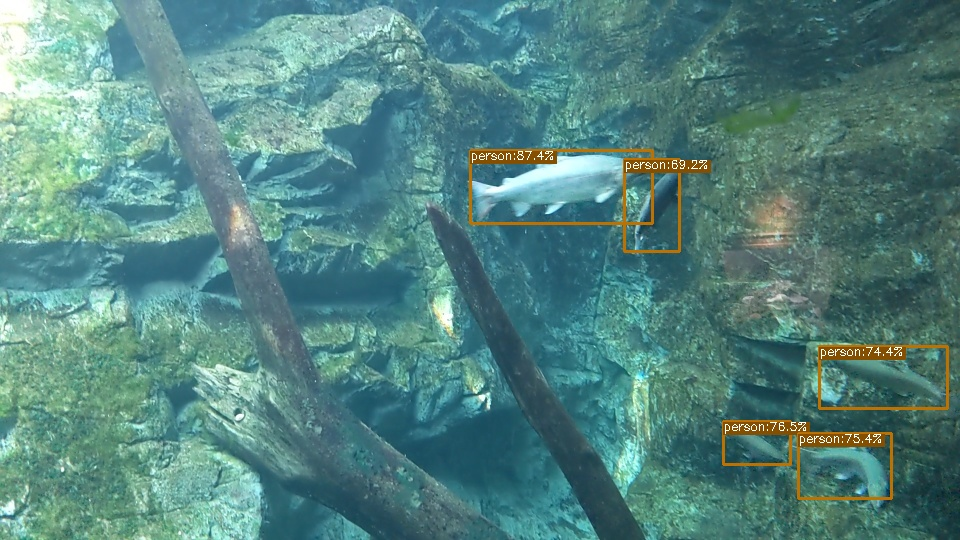

In [41]:
from PIL import Image

OUTPUT_IMAGE_PATH = "000050.jpg" 
Image.open(OUTPUT_IMAGE_PATH)